In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

#### Data used: Breast cancer data from University of California
#### https://archive.ics.uci.edu/ml/datasets.php

In [2]:
columns = ['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion',
           'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses', 'class']
df = pd.read_csv('breast-cancer-wisconsin.data', header=None, names=columns)
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### Data exploration: 

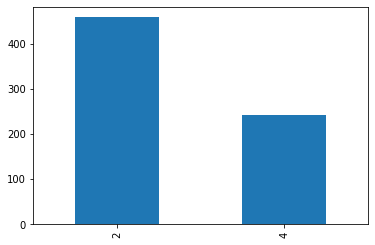

In [3]:
# Check for available no. of classes i.e. labels
df['class'].value_counts().plot(kind='bar');

In [4]:
# Check for missing values
df.dtypes

id                         int64
clump_thickness            int64
unif_cell_size             int64
unif_cell_shape            int64
marg_adhesion              int64
single_epith_cell_size     int64
bare_nuclei               object
bland_chrom                int64
norm_nucleoli              int64
mitoses                    int64
class                      int64
dtype: object

In [5]:
# As per the documentation, missing values are '?' in the dataset
# Let us find columns with the missing values
df.apply(lambda col: col=='?').sum()



C:\Users\j39\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


id                         0
clump_thickness            0
unif_cell_size             0
unif_cell_shape            0
marg_adhesion              0
single_epith_cell_size     0
bare_nuclei               16
bland_chrom                0
norm_nucleoli              0
mitoses                    0
class                      0
dtype: int64

In [6]:
# Replace all the missing values with outliers
df.replace('?', -99999, inplace=True)

#### Feature engineering:

In [7]:
# id column is not useful for the model predictions, for obvious reasons
# All other columns are features and one column is the class i.e. the label
df.drop('id', axis=1, inplace=True)

#### Model

In [8]:
X = np.array(df.drop('class', axis=1))
y = np.array(df['class'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
clf = neighbors.KNeighborsClassifier()

In [11]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
accuracy = clf.score(X_test, y_test)
accuracy

0.9571428571428572

#### Pickle the classifier

In [13]:
with open('classifier_pickled', 'wb') as f:
    pickle.dump(clf, f)

with open('classifier_pickled', 'rb') as f:
    classifier_pickled = pickle.load(f)

#### Predictions for new data

In [15]:
example_predict = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,1,2,2,3,2,1], [8,7,4,10,7,8,3,2,2]])
prediction = classifier_pickled.predict(example_predict)
prediction

array([2, 2, 4], dtype=int64)

#### Verify accuracy of the predictions

In [16]:
classifier_pickled.score(example_predict,prediction)

1.0

#### Verify the probability confidence for predictions

In [17]:
classifier_pickled.predict_proba(example_predict)

array([[1., 0.],
       [1., 0.],
       [0., 1.]])